# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
#Temperatures follow an arch that dips to lower temps at higher latitudes on the positive side.  This is likely due to more cities being located on the northern hempisphere, particularly at those coldest extremes of latitude.
#An overlay map of the cities that have the lowest temps at the latitudes closes to the equator tend to be located around the gobi desert and central plains of asia.
#Humidity extremes exist at all latitudes but tend to have a higher concentration in northern latitudes, again likely due to there being more cities there.
#Just like humidity tends towards the top (100%), wind speeds tend towards the bottom, clustering sround 5mph.  
#Cloudiness is interestingly spread out linearly in a squared grid pattern which leads me to believe that the date collection is rounded or tends towards estimates.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import urllib
import urllib.error
import urllib.request
import gmaps



# Import API key
from api_keys import api_key, gkey
#from api_keys import gkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

gmaps.configure(api_key=gkey)

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [3]:
cities

['torbay',
 'atuona',
 'mehamn',
 'rikitea',
 'castro',
 'bredasdorp',
 'isangel',
 'ushuaia',
 'sindor',
 'dikson',
 'otradnoye',
 'mackay',
 'saldanha',
 'mahajanga',
 'mataura',
 'ilulissat',
 'port blair',
 'chakradharpur',
 'teguldet',
 'guerrero negro',
 'hilo',
 'kapaa',
 'port elizabeth',
 'belushya guba',
 'khatanga',
 'san patricio',
 'chumikan',
 'bluff',
 'valparaiso',
 'kaitangata',
 'northam',
 'saint-philippe',
 'pemba',
 'bethel',
 'vaitupu',
 'cape town',
 'arraial do cabo',
 'praia da vitoria',
 'los llanos de aridane',
 'gushikawa',
 'jamestown',
 'bubaque',
 'ketchikan',
 'lagoa',
 'caibarien',
 'prince rupert',
 'avarua',
 'kodiak',
 'poum',
 'vardo',
 'kropotkin',
 'punta arenas',
 'illoqqortoormiut',
 'kamenskoye',
 'anchorage',
 'lorengau',
 'cherskiy',
 'kilindoni',
 'chokurdakh',
 'samusu',
 'makokou',
 'new norfolk',
 'ikorodu',
 'puerto ayora',
 'esperance',
 'saint george',
 'katangli',
 'roebourne',
 'cooma',
 'nishihara',
 'maraa',
 'carnarvon',
 'hermanu

In [4]:
settings = {"units": "imperial", "APPID": api_key}
location = "St. Louis"
api_key

'5c3ac42230120abdfc5f3508749a7b10'

In [5]:
current_weather = owm.get_current(location, **settings)
current_weather('id')

4407074

In [6]:
#weather_data = [owm.get_current(city, **settings) for city in cities]
#for city in cities:
#    owm.get_current(city, **settings)
#    print(city)
    
    
    

In [7]:
#weather_data = [ow.get_current(city, **settings) for city in cities]
weather_data = []
for city in cities:
    try:
        city_data = owm.get_current(city, **settings)               
        num = city_data('id')
        weather_data.append(city_data)
        print(f"Processing data for {city}: id# {num}")
    except:
        print(f"{city}: No such city in db.")
    

Processing data for torbay: id# 6167817
Processing data for atuona: id# 4020109
Processing data for mehamn: id# 778707
Processing data for rikitea: id# 4030556
Processing data for castro: id# 3896218
Processing data for bredasdorp: id# 1015776
Processing data for isangel: id# 2136825
Processing data for ushuaia: id# 3833367
Processing data for sindor: id# 492860
Processing data for dikson: id# 1507390
Processing data for otradnoye: id# 513898
Processing data for mackay: id# 5921525
Processing data for saldanha: id# 2737599
Processing data for mahajanga: id# 1062663
Processing data for mataura: id# 6201424
Processing data for ilulissat: id# 3423146
Processing data for port blair: id# 1259385
Processing data for chakradharpur: id# 1274890
Processing data for teguldet: id# 1489822
Processing data for guerrero negro: id# 4021858
Processing data for hilo: id# 5855927
Processing data for kapaa: id# 5848280
Processing data for port elizabeth: id# 4501427
belushya guba: No such city in db.
Pro

Processing data for san policarpo: id# 1688696
Processing data for manta: id# 685981
grand river south east: No such city in db.
Processing data for malihabad: id# 1264085
Processing data for krapivinskiy: id# 1502192
Processing data for zyryanka: id# 2119283
Processing data for garden city: id# 5118226
Processing data for aklavik: id# 5882953
stoyba: No such city in db.
Processing data for longyearbyen: id# 2729907
Processing data for yatou: id# 2225940
Processing data for pisco: id# 3932145
Processing data for balabac: id# 1728675
Processing data for viedma: id# 3832899
Processing data for sitka: id# 4267710
Processing data for samarai: id# 2132606
Processing data for hays: id# 4272782
Processing data for mikkeli: id# 646006
catamarca: No such city in db.
Processing data for bandarbeyla: id# 64814
Processing data for maracaju: id# 3457859
mys shmidta: No such city in db.
Processing data for nemuro: id# 2128975
Processing data for petatlan: id# 3992842
Processing data for yellowknife:

Processing data for mareeba: id# 2158767
Processing data for koslan: id# 544084
Processing data for tucurui: id# 3385935
Processing data for taoudenni: id# 2450173
Processing data for orange: id# 2154219
Processing data for cabedelo: id# 3404558
Processing data for nador: id# 2541479
Processing data for dano: id# 2361586
Processing data for tambacounda: id# 2244991
Processing data for adolfo ruiz cortines: id# 4019727
Processing data for hami: id# 1529484
Processing data for marawi: id# 1701054
tsihombe: No such city in db.
Processing data for saskylakh: id# 2017155
Processing data for namibe: id# 3347019
Processing data for alta floresta: id# 6316343
Processing data for southbridge: id# 4951594
Processing data for poronaysk: id# 2121909
Processing data for caborca: id# 3996893
Processing data for muros: id# 3115824
nguiu: No such city in db.
Processing data for tres arroyos: id# 3833859
Processing data for tamale: id# 2294877
Processing data for yinchuan: id# 1786657
attawapiskat: No 

Processing data for saint paul: id# 5045360
Processing data for aksarka: id# 1512019
Processing data for santa isabel do rio negro: id# 3662489
Processing data for natal: id# 3394023
Processing data for la ronge: id# 6050066
Processing data for bermejo: id# 3923154
Processing data for marsh harbour: id# 3571913
Processing data for saquena: id# 3692020
Processing data for mao: id# 3496831
Processing data for aksu: id# 1524298


In [8]:
weather_data

[{'coord': {'lon': -52.73, 'lat': 47.66},
  'weather': [{'id': 500,
    'main': 'Rain',
    'description': 'light rain',
    'icon': '10d'},
   {'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50d'}],
  'base': 'stations',
  'main': {'temp': 42.8,
   'pressure': 1021,
   'humidity': 100,
   'temp_min': 42.8,
   'temp_max': 42.8},
  'visibility': 805,
  'wind': {'speed': 13.87, 'deg': 140},
  'clouds': {'all': 90},
  'dt': 1541268000,
  'sys': {'type': 1,
   'id': 3467,
   'message': 0.0158,
   'country': 'CA',
   'sunrise': 1541240350,
   'sunset': 1541275745},
  'id': 6167817,
  'name': 'Torbay',
  'cod': 200},
 {'coord': {'lon': -139.03, 'lat': -9.8},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04d'}],
  'base': 'stations',
  'main': {'temp': 80.3,
   'pressure': 1028.68,
   'humidity': 100,
   'temp_min': 80.3,
   'temp_max': 80.3,
   'sea_level': 1028.76,
   'grnd_level': 1028.68},
  'wind': {'speed': 12.17, 'deg': 92.50

In [9]:
new_cities = [response('name') for response in weather_data]
len(new_cities)

550

In [10]:
summary = ["coord.lat", "coord.lon", "main.temp", "main.humidity", "wind.speed", "clouds.all"]
data = [response(*summary) for response in weather_data]


In [11]:
weather_data_df = pd.DataFrame(data, index=new_cities)
column_names = ["Latitude", "Longitude", "Temperature (F)", "Humidity", "Wind Speed (mph)", "Cloudiness %"]
weather_data_df = pd.DataFrame(data, index=new_cities, columns=column_names)
weather_data_df.head()

,Latitude,Longitude,Temperature (F),Humidity,Wind Speed (mph),Cloudiness %
Torbay,47.66,-52.73,42.80,100,13.87,90
Atuona,-9.80,-139.03,80.30,100,12.17,80
Mehamn,71.03,27.85,33.28,95,3.56,92
Rikitea,-23.12,-134.97,74.05,98,18.66,76
Castro,-42.48,-73.76,51.50,97,18.70,92


In [12]:
weather_data_df.to_csv("Weather_Data.csv")

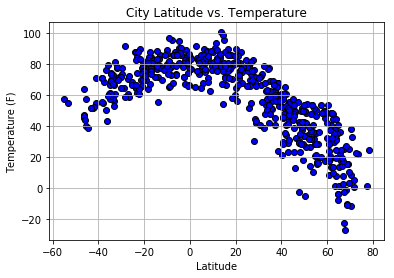

In [13]:
plt.scatter(weather_data_df['Latitude'], weather_data_df['Temperature (F)'], c='b', edgecolor='black' )
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("City Latitude vs. Temperature")
plt.savefig("../Images/CityLatVsTemp.png")

In [14]:
low_temp = weather_data_df.loc[weather_data_df['Temperature (F)'] < 25, ['Temperature (F)', 'Latitude', 'Longitude']]
low_temp_low_lat = low_temp.loc[low_temp['Latitude'] <= 60, :]
low_temp_low_lat.sort_values("Latitude", ascending=True)

,Temperature (F),Latitude,Longitude
Yinchuan,24.10,38.48,106.21
Yumen,21.35,40.29,97.04
Hami,23.33,42.84,93.51
Baijiantan,23.42,45.63,85.18
Mandalgovi,13.25,45.76,106.27
Altay,-2.28,47.83,88.13
Ayagoz,23.56,47.96,80.43
Poyarkovo,18.16,49.62,128.65
Kholtoson,-4.80,50.30,103.31
Toora-Khem,14.15,52.47,96.11


In [15]:
locations = low_temp_low_lat[["Latitude", "Longitude"]].astype(float)
weight = low_temp_low_lat["Temperature (F)"].astype(float) 
len(locations), len(weight)


(18, 18)

In [16]:
fig = gmaps.figure()
markers = gmaps.marker_layer(locations)

fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

In [18]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=weight, 
                                 dissipating=False, max_intensity=1,
                                 point_radius=10)
heat_layer.dissipating = False
heat_layer.max_intensity = 1
heat_layer.point_radius = 2

fig.add_layer(heat_layer)
fig

InvalidWeightException: -4.8 is not a valid weight. Weights must be non-negative.

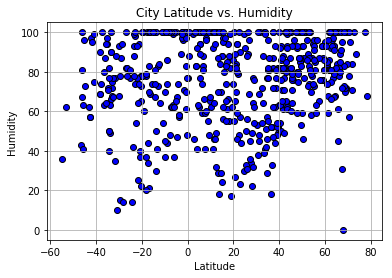

In [19]:
plt.scatter(weather_data_df['Latitude'], weather_data_df['Humidity'], c='b', edgecolor='black' )
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")
plt.savefig("../Images/CityLatVsHumidity.png")

In [20]:
humid_sort = weather_data_df.sort_values("Humidity", ascending=False)
humid_sort.head()

,Latitude,Longitude,Temperature (F),Humidity,Wind Speed (mph),Cloudiness %
Torbay,47.66,-52.73,42.80,100,13.87,90
Kilindoni,-7.91,39.67,79.49,100,11.65,64
Lavrentiya,65.58,-170.99,36.25,100,20.11,20
Ranau,5.95,116.67,67.75,100,1.77,8
Bar Harbor,44.39,-68.20,50.63,100,5.82,90


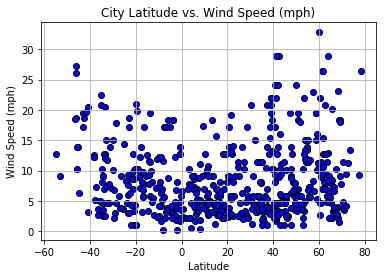

In [21]:
plt.scatter(weather_data_df['Latitude'], weather_data_df['Wind Speed (mph)'], c='b', edgecolor='black' )
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (mph)")
plt.savefig("../Images/CityLatVsWindSpeed.png")

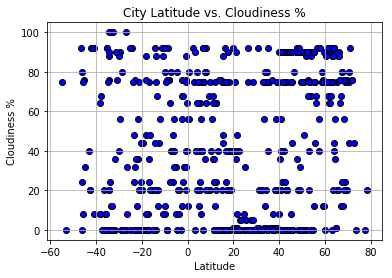

In [22]:
plt.scatter(weather_data_df['Latitude'], weather_data_df["Cloudiness %"], c='b', edgecolor='black' )
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs. Cloudiness %")
plt.savefig("../Images/CityLatVsCloudiness.png")

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot